Lab 3: Training an image classifier using CNN

For example, we will be discussing about details of CNN based model traning forc ats and dogs images. But, do explore other Image classfications datasets for CNN and try our running a classfier for the same. 
https://www.imageannotation.ai/blog/top-10-image-datasets-for-machine-learning
https://datasetsearch.research.google.com/


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Data"

In [ ]:
%cd /content/gdrive/My Drive/Data/test/bike

/content/gdrive/My Drive/Data/test/bike


In [ ]:
!kaggle datasets download -d andrewmvd/helmet-detection

In [ ]:
!unzip \*.zip

In [ ]:
!wget -i bike.txt

**Dataset Download and visualization**
The contents of the .zip are extracted to the base directory /tmp/cats_and_dogs_filtered, which contains train and validation subdirectories for the training and validation datasets 

In [ ]:
!wget --no-check-certificate \https://www-old.emt.tugraz.at/~pinz/data/GRAZ_01/bikes.zip

In [ ]:
!unzip \*bikes.zip

In [ ]:
import os
base_dir = '/content/gdrive/My Drive/Data'

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

train_person_dir = os.path.join(train_dir, 'persons')
train_bikes_dir = os.path.join(train_dir, 'bike')
train_helmet_dir = os.path.join(train_dir, 'helmet')

test_person_dir = os.path.join(test_dir, 'person')
test_bikes_dir = os.path.join(test_dir, 'bike')
test_helmet_dir = os.path.join(test_dir, 'helmet')

In [ ]:
print('train person :', len(os.listdir(train_person_dir ) ))
print('train bike :', len(os.listdir(train_bikes_dir) ))
print('train helmet :', len(os.listdir(train_helmet_dir ) ))

print('test person :', len(os.listdir( test_person_dir ) ))
print('test bike :', len(os.listdir( test_bikes_dir ) ))
print('test helmet :', len(os.listdir( test_helmet_dir ) ))

train person : 298
train bike : 300
train helmet : 103
test person : 60
test bike : 60
test helmet : 60


In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy', 
             optimizer=RMSprop(lr=0.001), 
             metrics=['acc'])

In [ ]:
"""model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit("/content/gdrive/My Drive/Data/persons", epochs=10)"""

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=5,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))     

test_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=5,
                                                         class_mode  = 'categorical',
                                                         target_size = (150, 150))


Found 650 images belonging to 3 classes.
Found 142 images belonging to 3 classes.


In [ ]:
history = model.fit(train_generator,
                              validation_data=test_generator,
                              steps_per_epoch=100,
                              epochs=10,
                              validation_steps=28,
                              verbose=2)

Epoch 1/10
100/100 - 136s - loss: 0.6966 - acc: 0.7120 - val_loss: 0.6963 - val_acc: 0.6500
Epoch 2/10
100/100 - 29s - loss: 0.3686 - acc: 0.8740 - val_loss: 0.5086 - val_acc: 0.8000
Epoch 3/10
100/100 - 7s - loss: 0.2887 - acc: 0.8920 - val_loss: 0.5444 - val_acc: 0.7857
Epoch 4/10
100/100 - 6s - loss: 0.2112 - acc: 0.9560 - val_loss: 0.9305 - val_acc: 0.7500
Epoch 5/10
100/100 - 4s - loss: 0.1890 - acc: 0.9400 - val_loss: 1.6932 - val_acc: 0.6143
Epoch 6/10
100/100 - 4s - loss: 0.1704 - acc: 0.9560 - val_loss: 0.7386 - val_acc: 0.7357
Epoch 7/10
100/100 - 4s - loss: 0.1578 - acc: 0.9660 - val_loss: 1.1449 - val_acc: 0.7643
Epoch 8/10
100/100 - 4s - loss: 0.1370 - acc: 0.9620 - val_loss: 1.3682 - val_acc: 0.7000
Epoch 9/10
100/100 - 4s - loss: 0.0709 - acc: 0.9800 - val_loss: 1.3319 - val_acc: 0.7429
Epoch 10/10
100/100 - 4s - loss: 0.0710 - acc: 0.9800 - val_loss: 1.8164 - val_acc: 0.7286


Text(0.5, 1.0, 'Training and test loss')

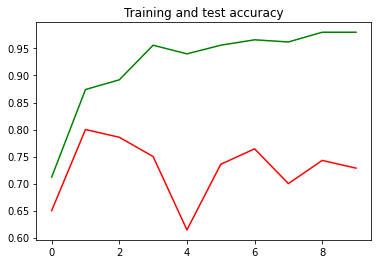

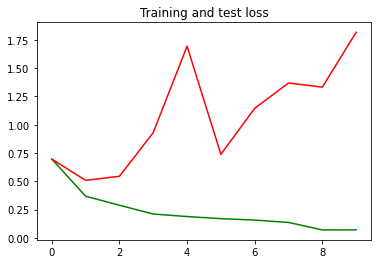

In [ ]:
import matplotlib.pyplot as plt

acc      = history.history['acc']
val_acc  = history.history['val_acc']
loss     = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) 


plt.plot  ( epochs, acc , 'g')
plt.plot  ( epochs, val_acc , 'r')
plt.title ('Training and test accuracy')
plt.figure()

plt.plot  ( epochs, loss , 'g' )
plt.plot  ( epochs, val_loss , 'r')
plt.title ('Training and test loss'   )

In [ ]:
%cd /content/gdrive/My Drive/Data
model.save('minor.h5')

/content/gdrive/My Drive/Data


In [ ]:
import numpy as np
from keras.models import load_model
%cd /content/
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  img=image.img_to_array(img)
  img=np.expand_dims(img, axis=0)
  #print(img)
  img = img.astype('float32')
  img = img / 255.0
  classes = ['person','helmet','bike']
  model = load_model('minor.h5')
  result = np.argmax(model.predict(img), axis=-1)
  temp=classes[result[0]]
  print(temp," has highest accuracy ", model.predict(img))

/content


Saving minor.h5 to minor.h5


In [ ]:
#cleanup the kernal

import os, signal

os.kill(     os.getpid() , 
         signal.SIGKILL
       )